1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


2. Load the Dataset into DataFrame

In [4]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. Basic Data Exploration

In [5]:
#Data shape:rows and columns
print('Dataset shape:',df.shape)

#column data types and non-null counts
print('\nData info:')
print(df.info())


#Check for missing/null values
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (7043, 21)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

4.Check Unique Values in Categorical Columns


In [6]:
# Show unique values for each object (categorical) column
for col in df.select_dtypes(include='object').columns:
  print(f"{col}->{df[col].unique()}")
  print('-'* 40)

customerID->['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
gender->['Female' 'Male']
----------------------------------------
Partner->['Yes' 'No']
----------------------------------------
Dependents->['No' 'Yes']
----------------------------------------
PhoneService->['No' 'Yes']
----------------------------------------
MultipleLines->['No phone service' 'No' 'Yes']
----------------------------------------
InternetService->['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity->['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup->['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection->['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport->['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV->['No' 'Yes' 'No internet service']
------------

5. Data Cleaning

In [7]:
df=df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

df.dropna(subset=['TotalCharges'],inplace=True)


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

<ipython-input-7-1537266425>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


6. Visualize Churn Counts

<ipython-input-8-367716651>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Churn',palette='pastel')


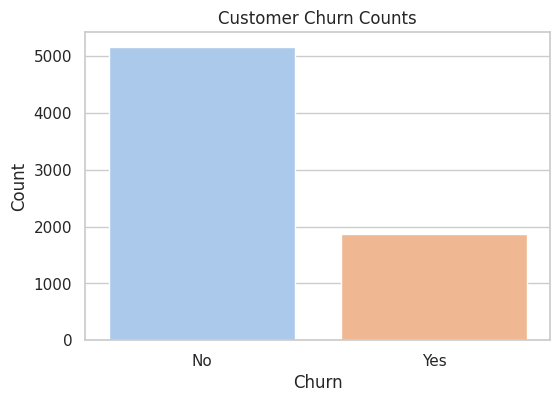

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Churn',palette='pastel')
plt.title('Customer Churn Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


7.Find Your Actual Numbers

In [9]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


8. Churn By Gender

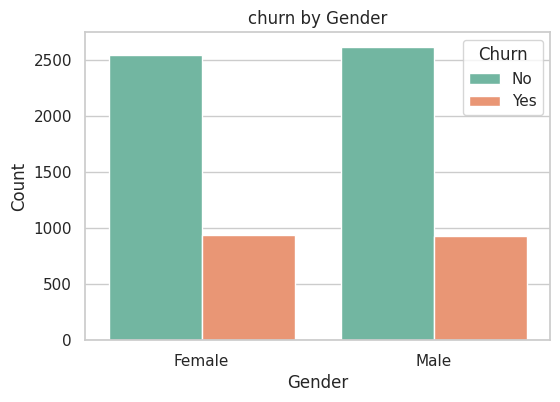

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='gender',hue='Churn',palette='Set2')
plt.title('churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

9.Churn By Contract


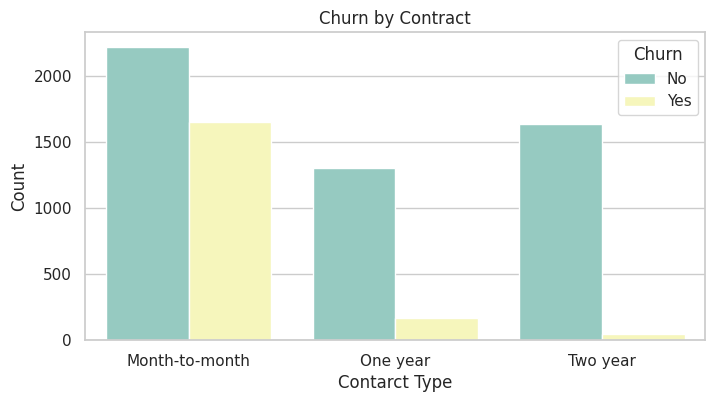

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Contract',hue='Churn',palette='Set3')
plt.title('Churn by Contract')
plt.xlabel('Contarct Type')
plt.ylabel('Count')
plt.show()

10.Churn by senior Citizen


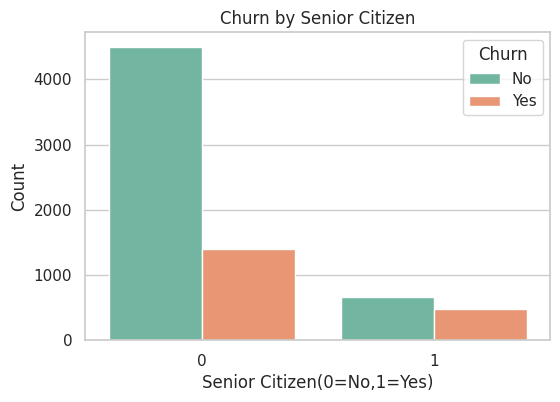

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='SeniorCitizen',hue='Churn',palette='Set2')
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen(0=No,1=Yes)')
plt.ylabel('Count')
plt.show()